In [3]:
import pandas as pd
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### merging 12 months of sales data in a single file

In [4]:
df = pd.read_csv('/Users/ashahwaka/Downloads/Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('/Users/ashahwaka/Downloads/Sales_Data')]
# create an empty data frame
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('/Users/ashahwaka/Downloads/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.head()
all_months_data.to_csv("new_sales_data.csv",index=False)

In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


# Read updated data

In [6]:
new_data = pd.read_csv('/Users/ashahwaka/new_sales_data.csv')
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# clean up the data

In [7]:
new_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
new_data = new_data.dropna()

In [9]:
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# Augment the data with additional columns

### Task 2 Add months data

In [10]:
new_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
new_data['Order Date']

0         12/30/19 00:01
1         12/29/19 07:03
2         12/12/19 18:21
3         12/22/19 15:13
4         12/18/19 12:38
               ...      
186845    06/07/19 19:02
186846    06/01/19 19:29
186847    06/22/19 18:57
186848    06/26/19 18:35
186849    06/25/19 14:33
Name: Order Date, Length: 186305, dtype: object

In [16]:
new_data['Order Date'] = pd.to_datetime(new_data['Order Date'],errors='coerce')

/var/folders/0x/8mzn531s42xf4x89nq4bydbw0000gn/T/ipykernel_19126/2800282786.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data['Order Date'] = pd.to_datetime(new_data['Order Date'],errors='coerce')


In [17]:
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [18]:
new_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"
186849,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301"


# Task 3; Add a sales column

In [19]:
new_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## convert columns to the correct type

In [20]:
new_data['Order Date'] = new_data['Order Date'].fillna(0)
row_254 = new_data.iloc[254]
print(row_254)

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                         0
Purchase Address    Purchase Address
Name: 254, dtype: object


In [21]:
invalid_rows = new_data[~new_data['Quantity Ordered'].str.isnumeric()]
print(invalid_rows)

        Order ID  Product  Quantity Ordered  Price Each Order Date  \
254     Order ID  Product  Quantity Ordered  Price Each          0   
705     Order ID  Product  Quantity Ordered  Price Each          0   
1101    Order ID  Product  Quantity Ordered  Price Each          0   
2875    Order ID  Product  Quantity Ordered  Price Each          0   
3708    Order ID  Product  Quantity Ordered  Price Each          0   
...          ...      ...               ...         ...        ...   
183671  Order ID  Product  Quantity Ordered  Price Each          0   
184012  Order ID  Product  Quantity Ordered  Price Each          0   
184041  Order ID  Product  Quantity Ordered  Price Each          0   
184275  Order ID  Product  Quantity Ordered  Price Each          0   
186532  Order ID  Product  Quantity Ordered  Price Each          0   

        Purchase Address  
254     Purchase Address  
705     Purchase Address  
1101    Purchase Address  
2875    Purchase Address  
3708    Purchase Address

In [22]:
new_data = new_data[new_data['Order ID'] != 'Order ID']

In [23]:
new_data['Quantity Ordered'] = pd.to_numeric(new_data['Quantity Ordered'], errors='coerce')

In [24]:
new_data['Price Each'] = pd.to_numeric(new_data['Price Each'], errors='coerce')

In [25]:
new_data = new_data.dropna()

In [26]:
new_data['Quantity Ordered'] = pd.to_numeric(new_data['Quantity Ordered'])

In [27]:
new_data['Price Each'] = pd.to_numeric(new_data['Price Each'])

In [28]:
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


In [29]:
new_data['Order Date'] = pd.to_datetime(new_data['Order Date'])

In [30]:
new_data['Months'] = new_data['Order Date'].dt.month.fillna(0).astype('int32')

In [31]:
new_data['Total Sales'] = new_data['Quantity Ordered'] * new_data['Price Each']

In [32]:
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


# What was the best month for sales? How much was earned that month?

In [33]:
results = new_data.groupby('Months').sum(numeric_only=True)
# new_data['Months'].dtypes
results

,Quantity Ordered,Price Each,Total Sales
Months,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [34]:
import matplotlib.pyplot as plt

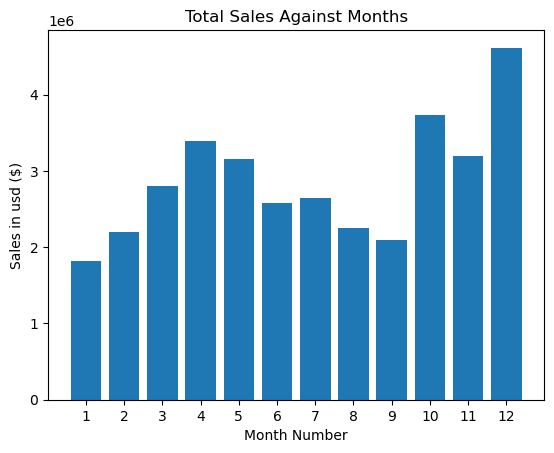

In [35]:
months = range(1,13)
plt.bar(months,results['Total Sales'])
plt.xticks(months)
plt.ylabel('Sales in usd ($)')
plt.xlabel('Month Number')
plt.title('Total Sales Against Months')
plt.show()

# What US City has the highest number of sales

In [36]:
new_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Sales
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0


In [37]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
new_data['City'] = new_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

In [38]:
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


# city with highest number of sales

In [39]:
results = new_data.groupby('City').sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Months,Total Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


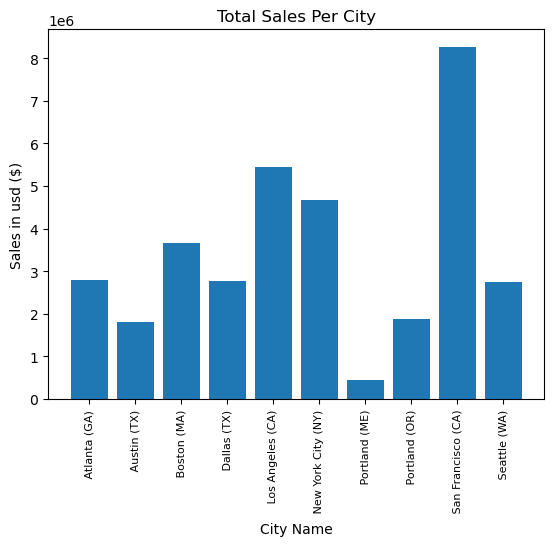

In [40]:
cities = [city for city, df in new_data.groupby('City')]
cities
plt.bar(cities,results['Total Sales'])
plt.xticks(cities,rotation='vertical', size=8)
plt.ylabel('Sales in usd ($)')
plt.xlabel('City Name')
plt.title('Total Sales Per City')
plt.show() 

# What time should we display the advertisement to maximize the likelihood of customers buying the products

In [41]:
new_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City (NY)
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0,New York City (NY)


In [42]:
new_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Months                       int32
Total Sales                float64
City                        object
dtype: object

In [43]:
new_data['Hour'] = new_data['Order Date'].dt.hour

In [44]:
new_data['Minute'] = new_data['Order Date'].dt.minute

In [45]:
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [46]:
 new_data.groupby('Hour').count() #use of count

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


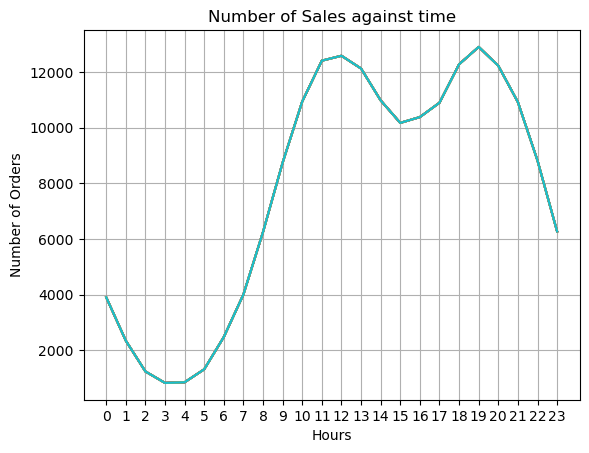

In [47]:
hours = [hour for hour, df in new_data.groupby('Hour')]
plt.plot(hours,new_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.title('Number of Sales against time')
plt.show()

In [48]:
# use of sum
new_data.groupby('Hour')['Total Sales'].sum()

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Total Sales, dtype: float64

# What products are most often sold together

In [49]:
 new_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0,New York City (NY),7,3


In [50]:
 df = new_data[new_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

/var/folders/0x/8mzn531s42xf4x89nq4bydbw0000gn/T/ipykernel_19126/2135812610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


In [51]:
  df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [52]:
from itertools import combinations
from collections import Counter

In [53]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


 # What product sold the most?Why do you think so?

In [54]:
new_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0,New York City (NY),7,3


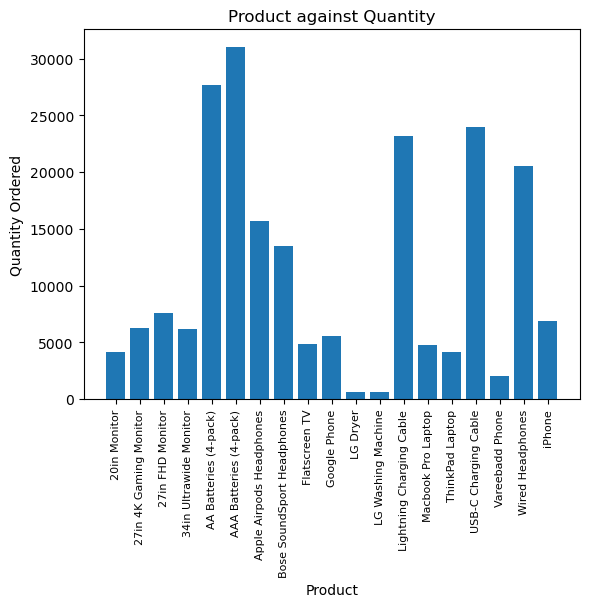

In [56]:
product_group = new_data.groupby('Product')
Quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered'] 

products = [product for product,df in product_group]
plt.bar(products,Quantity_ordered)
plt.xticks(products,rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.title('Product against Quantity')
plt.show()

In [68]:
prices = new_data.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/var/folders/0x/8mzn531s42xf4x89nq4bydbw0000gn/T/ipykernel_19126/805405333.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical',size=8)


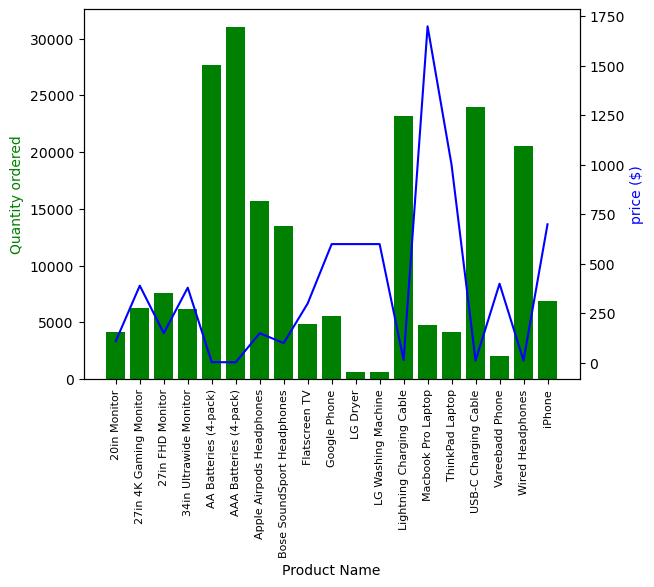

In [69]:
prices = new_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity ordered',color='g')
ax2.set_ylabel('price ($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical',size=8)
plt.show()